170508288/170498071 [==============================] - 30s 0us/step
Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)
(32, 32, 3)


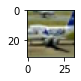

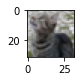

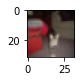

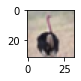

The Shape before one-hot encoding:  (50000, 1)
The Shape after one-hot encoding:  (50000, 10)
Epoch 1/20
391/391 [==============================] - 299s 755ms/step - loss: 1.6153 - accuracy: 0.4080 - val_loss: 1.1432 - val_accuracy: 0.5916
Epoch 2/20
391/391 [==============================] - 293s 749ms/step - loss: 1.1144 - accuracy: 0.6080 - val_loss: 0.9036 - val_accuracy: 0.6794
Epoch 3/20
391/391 [==============================] - 305s 781ms/step - loss: 0.9106 - accuracy: 0.6822 - val_loss: 0.8131 - val_accuracy: 0.7224
Epoch 4/20
391/391 [==============================] - 303s 776ms/step - loss: 0.7988 - accuracy: 0.7243 - val_loss: 0.7543 - val_accuracy: 0.7399
Epoch 5/20
391/391 [==============================] - 307s 787ms/step - loss: 0.7141 - accuracy: 0.7544 - val_loss: 0.6953 - val_accuracy: 0.7624
Epoch 6/20
391/391 [==============================] - 304s 777ms/step - loss: 0.6506 - accuracy: 0.7732 - val_loss: 0.6824 - val_accuracy: 0.7632
Epoch 7/20
391/391 [==========

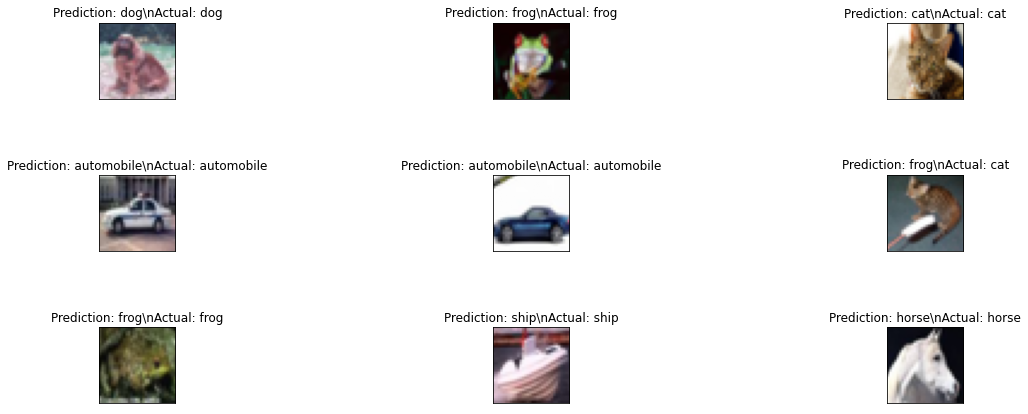

In [1]:
import tensorflow as tf
from matplotlib import pyplot as pp
%matplotlib inline
import numpy as np
import keras 
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))
print(X_train[0].shape)
for i in range(332,336):
    pp.subplot(120 + 1 + i)
    img = X_train[i]
    pp.imshow(img)
    pp.show()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test=X_test/255
n_classes = 10
print("The Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("The Shape after one-hot encoding: ", Y_train.shape)
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))
classes = range(0,10)
names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_labels = dict(zip(classes, names))
batch = X_test[101:110]
labels = np.argmax(Y_test[101:110],axis=-1)
predictions = model.predict(batch, verbose = 1)
print (predictions)
for image in predictions:
   print(np.sum(image))
class_result = np.argmax(predictions,axis=-1)
print (class_result)
x, y = pp.subplots(3, 3, figsize = (20,7))
x.subplots_adjust(hspace = 1)
y = y.flatten()
for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            y[i].set_title(title)
            y[i].axes.get_xaxis().set_visible(False)
            y[i].axes.get_yaxis().set_visible(False)

    y[i].imshow(img)
pp.show()